# TP3 - Exercice 3: Régression avec les arbres de décision - California Housing

## 1. Importer les bibliothèques nécessaires et charger le jeu de données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset = fetch_california_housing()
X = dataset.data
y = dataset.target

## 2. Afficher les informations sur le jeu de données

In [3]:
print("Informations sur le jeu de données :\n")
print(f"Nombre total d'instances : {X.shape[0]}")
print(f"Nombre de variables (features) : {X.shape[1]}")
print("Noms des variables :")
for i, feature in enumerate(dataset.feature_names):
    print(f"{i+1} - {feature}")

Informations sur le jeu de données :

Nombre total d'instances : 20640
Nombre de variables (features) : 8
Noms des variables :
1 - MedInc
2 - HouseAge
3 - AveRooms
4 - AveBedrms
5 - Population
6 - AveOccup
7 - Latitude
8 - Longitude


## 3. Séparer les données (70% train, 30% test)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [5]:
print(f"L'ensemble d'entrainement : {X_train.shape[0]} echantillons.")
print(f"L'ensemble de test : {X_test.shape[0]} echantillons.")

L'ensemble d'entrainement : 14448 echantillons.
L'ensemble de test : 6192 echantillons.


## 4. Créer un modèle avec les paramètres par défaut

In [6]:
dt_default = DecisionTreeRegressor(random_state=42)

## 5. Entrainer le modèle

In [7]:
dt_default.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## 6. Evaluer les performances du modèle
Pour calculer le R², on doit d'abord faire les prédictions de notre modèle

In [8]:
# Calcule des predictions 
y_train_pred = dt_default.predict(X_train)
y_test_pred = dt_default.predict(X_test)

In [9]:
# Score R² sur l'ensemble d'entrainement
r2_train = r2_score(y_train, y_train_pred)
print(f"Score R² sur l'ensemble d'entrainement : {r2_train}")

Score R² sur l'ensemble d'entrainement : 1.0


In [10]:
# Score R² et la RMSE sur l’ensemble de test
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)

print(f"Score R² sur l'ensemble de test : {r2_test:.4}")
print(f"RMSE sur l'ensemble de test : {rmse_test:.4}")

Score R² sur l'ensemble de test : 0.5977
RMSE sur l'ensemble de test : 0.5281


## 7. Comparer les performances et détecter l'overfitting

Les performances du modèle montrent un **R² de 1.0** sur l'ensemble d'entraînement et un **R² de 0.5977** sur l'ensemble de test, avec une **RMSE de 0.5281** sur le test.

Cette différence marquée entre les deux scores **R²** indique un signe clair d'**overfitting** (*surapprentissage*).

Le modèle a **parfaitement appris** les données d'entraînement (**R² = 1.0**), mais **généralise mal** aux nouvelles données (**R² = 0.5977** sur le test).

L’overfitting signifie que le modèle s’est **trop adapté aux spécificités (voire au bruit)** des données d’entraînement, ce qui nuit à sa capacité à **prédire correctement des données jamais vues**.


## 8. Afficher l’arbre de régression généré

In [15]:
print("Informations sur l'arbre généré :\n")
print(f"Profondeur de l'arbre :{dt_default.get_depth()}")
print(f"Nombre de feuilles : {dt_default.get_n_leaves()}")
print(f"Nombre total de noeuds : {dt_default.tree_.node_count}")

Informations sur l'arbre généré :

Profondeur de l'arbre :34
Nombre de feuilles : 13833
Nombre total de noeuds : 27665


<span style='color:red'>**Remarque** : </span></br>
L'arbre est très grand, ce qui explique l'overfitting.</br>
Et avec cette grande taille, on ne peut pas l'afficher avec le code suivant :
<pre lang="markdown">
plt.figure(figsize=(20,10))
plot_tree(
    dt_default,
    filled=True,
    feature_names=dataset.feature_names,
    rounded=True,
    fontsize=12
)
plt.title("L’arbre de régression généré")
plt.show()
</pre>

## 9. Variable la plus utilisée dans les premières divisions

In [27]:
feature_importance = dt_default.feature_importances_
most_important_idx = np.argmax(feature_importance)
print(f"Variable la plus importante : {dataset.feature_names[most_important_idx]}")
print(f"Score d'importance : {feature_importance[most_important_idx]:.4}")

Variable la plus importante : MedInc
Score d'importance : 0.5235


## 10 & 11. Entrainer et tester des arbres avec des différentes profondeurs

In [28]:
depths = range(1,21)
train_scores = []
test_scores = []

for depth in depths : 
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f"Arbre avec max_depth={depth}; score R² sur le train : {r2_train:.4}, score R² sur le test: {r2_test:.4}")

    train_scores.append(r2_train)
    test_scores.append(r2_test)

Arbre avec max_depth=1; score R² sur le train : 0.3141, score R² sur le test: 0.2995
Arbre avec max_depth=2; score R² sur le train : 0.4503, score R² sur le test: 0.4393
Arbre avec max_depth=3; score R² sur le train : 0.5383, score R² sur le test: 0.5181
Arbre avec max_depth=4; score R² sur le train : 0.5888, score R² sur le test: 0.5677
Arbre avec max_depth=5; score R² sur le train : 0.6321, score R² sur le test: 0.603
Arbre avec max_depth=6; score R² sur le train : 0.6769, score R² sur le test: 0.6355
Arbre avec max_depth=7; score R² sur le train : 0.7142, score R² sur le test: 0.6541
Arbre avec max_depth=8; score R² sur le train : 0.7587, score R² sur le test: 0.6773
Arbre avec max_depth=9; score R² sur le train : 0.7995, score R² sur le test: 0.6965
Arbre avec max_depth=10; score R² sur le train : 0.8367, score R² sur le test: 0.6834
Arbre avec max_depth=11; score R² sur le train : 0.8745, score R² sur le test: 0.6729
Arbre avec max_depth=12; score R² sur le train : 0.9048, score R

## 12. Tracer la courbe des scores

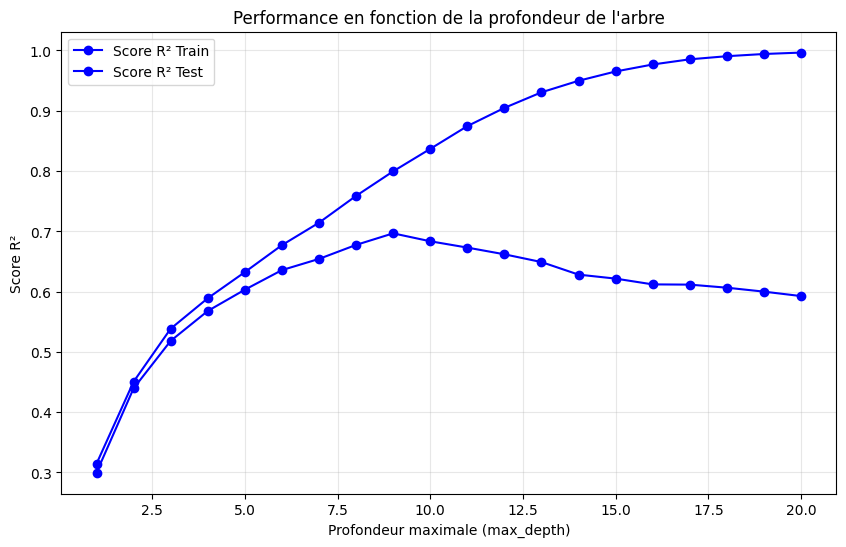

In [29]:
plt.figure(figsize=(10,6))
plt.plot(depths, train_scores, 'o-', label='Score R² Train', color='blue')
plt.plot(depths, test_scores, 'o-', label='Score R² Test', color='blue')
plt.xlabel('Profondeur maximale (max_depth)')
plt.ylabel('Score R²')
plt.title("Performance en fonction de la profondeur de l'arbre")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [30]:
best_depth_idx = np.argmax(test_scores)
best_depth = depths[best_depth_idx]
print(f"Meilleure profondeur selon le score test: {best_depth}")
print(f"Score R² correspondant: {test_scores[best_depth_idx]:.4f}")


Meilleure profondeur selon le score test: 9
Score R² correspondant: 0.6965


## 13. À partir de quelle profondeur le modèle commence-t-il à sur-apprendre ?

Le modèle commence à sur-apprendre à partir d'une **profondeur de 9**.

### Explication

En observant le graphique, on peut identifier le sur-apprentissage par la divergence des courbes :

- **Jusqu'à max_depth=9** : Les scores R² d'entraînement et de test augmentent ensemble
- **À partir de max_depth=10** : Le score d'entraînement continue d'augmenter tandis que le score de test commence à diminuer

Cette divergence indique que l'arbre mémorise les données d'entraînement plutôt que d'apprendre des patterns généralisables, caractérisant ainsi le sur-apprentissage.



## 14. GridSearchCV pour optimisation

In [36]:
# Recherche des meilleurs paramètres avec GridSearchCV
param_grid = {
    'max_depth' : [3,5,7,10,15],
    'min_samples_leaf':[1,2,5,10,20]
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, 15],
                         'min_samples_leaf': [1, 2, 5, 10, 20]},
             scoring='r2')

## 15. Affichage

In [37]:
print("Meilleurs parametres:", grid_search.best_params_)
print(f"Score moyen de validation croisée : {grid_search.best_score_:.4f}")

Meilleurs parametres: {'max_depth': 15, 'min_samples_leaf': 20}
Score moyen de validation croisée : 0.7081


## 16. Évaluez le modèle optimal sur l’ensemble de test 

In [39]:
model_optimal = grid_search.best_estimator_
y_test_pred_opt = model_optimal.predict(X_test)

r2_test_opt = r2_score(y_test, y_test_pred_opt)
rmse_test_opt = mean_squared_error(y_test, y_test_pred_opt)

print(f"Score R² sur l'ensemble de test : {r2_test_opt:.4f}")
print(f"RMSE sur l'ensemble de test : {rmse_test_opt:.4f}")

Score R² sur l'ensemble de test : 0.7170
RMSE sur l'ensemble de test : 0.3714


<span style='color:red'>**Remarque** : </span></br> Cela indique que le modèle explique environ 71.7% de la variance des données de test, avec une erreur quadratique moyenne raisonnablement faible.

## 17. Meilleure configuration

La configuration sélectionnée par `GridSearchCV` (**max_depth = 15**, **min_samples_leaf = 20**) offre un bon compromis :

- Elle évite un arbre trop profond, ce qui limite le risque de surapprentissage (overfitting),
- Elle maintient une performance correcte sur les données de test (**R² = 0.7170**),
- Elle améliore la capacité du modèle à généraliser à de nouvelles données.

Un arbre avec une profondeur plus faible ou un nombre de feuilles minimal plus grand aurait probablement sous-appris ; inversement, une profondeur trop grande (comme 34) aurait surexploité les données d’entraînement.

## 18. Avantages et limites d’un arbre de régression sur ce jeu de données

### Avantages :
- Facilement interprétable grâce à sa structure arborescente,
- Capable de modéliser des relations non linéaires complexes,
- Pas besoin de normaliser les données,
- Prend en charge les variables quantitatives comme qualitatives.

### Limites :
- Risque de surapprentissage si non régularisé (profondeur élevée),
- Sensible aux variations dans les données (instabilité),
- Les prédictions sont en paliers, moins précises que des modèles lisses,
- Moins performant que les modèles d’ensemble comme la forêt aléatoire ou le gradient boosting.

### Conclusion :
Un arbre de régression reste un bon point de départ simple et explicatif. Mais sur des jeux de données complexes comme `California Housing`, des modèles plus robustes comme `RandomForestRegressor` peuvent offrir de meilleures performances.
